1. **Skewness**
**Definition**
Skewness measures the asymmetry of the probability distribution of a real-valued random variable. Mathematically, skewness is defined as the third standardized moment:
Skewness=E[(X−μ)3]σ3Skewness=σ3E[(X−μ)3]
where μμ is the mean, σσ is the standard deviation, and EE is the expectation operator.                                                                        
**Description**
Skewness indicates whether the data is skewed to the left (negative skew) or right (positive skew). In financial time series, positive skewness often indicates frequent small losses and a few extreme gains. Negative skewness often indicates that asset is prone to sudden and significant drop in value.     
**Demonstration & Diagram:**
For Demonstration purpose we used simulated random data and introduced positive skewness (.83)


In [ ]:
import numpy as np
import scipy.stats as stats

# Simulated returns with positive skewness
returns = np.random.normal(0, 1, 1000) + np.random.exponential(1, 1000)
skewness = stats.skew(returns)
print(f"Skewness: {skewness:.2f}")

Skewness: 0.83


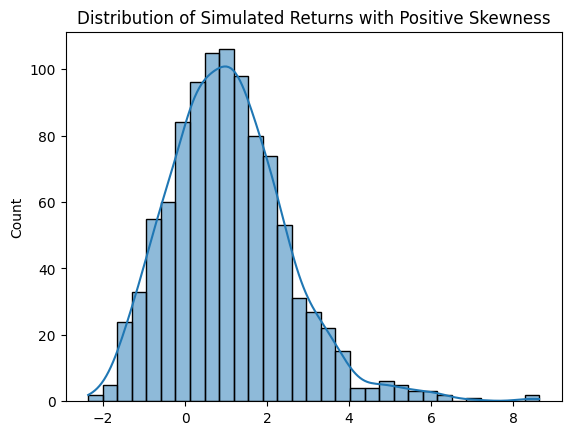

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.histplot(returns, kde=True)
plt.title("Distribution of Simulated Returns with Positive Skewness")
plt.show()

In the above chart it displays positive skewness as most of the return is clustered near zero or slightly negative values. A long tail suggests fewer but extreme positive returns. This can help to understand that downside risk is limited to as compared to upside potential. Also, since mean is greater than median in this case average returns are inflated by extreme positive values. This can help in forming trading strategies for example buying OTM calls may profit from skewness. This distribution highlights how infrequent large gains distort return profiles. Recognizing positive skew helps traders and portfolio managers better assess risk-reward asymmetries and adjust strategies accordingly.                                                                     
**Diagnosis**                                                                    
1)Skewness can be diagnosed by calculating the sample skewness coefficient. A value significantly different from zero indicates skewness.                      
2)Other way can be to plot the Distribution using Histogram or Box plot or QQ plot.                                                                            
3)Using Normality test like Jarque-Bera can help to identify Skewness.


**Damage:**                                                                      
1)Ignoring skewness can lead to mispricing of derivatives, as models like Black-Scholes assume symmetric returns. This can result in incorrect hedging strategies and unexpected losses.                                                
2)Investors might overestimate the likelihood of large wins due to infrequent but memorable spikes.
3)Apart from this ignoring skewness can lead to overstating or understanding of VaR measures.

**Directions**                                                                   
1)Use models that account for skewness, such as the Skew Normal Distribution or Stochastic Volatility Models.                                                    
2)Transform the data using methods like Box-Cox transformation to reduce skewness.


1. **Kurtosis / Heteroscedasticity**                                             
**Definition  **  

Kurtosis measures the "tailedness" of the probability distribution. Excess kurtosis is defined as: Excess Kurtosis=E[(X−μ)4]σ4−3Excess Kurtosis=σ4E[(X−μ)4]−3
Heteroscedasticity refers to the non-constant variance of a time series over time.  bold text                                                                           
**Description**                                                                  
High kurtosis indicates fat tails, meaning extreme values are more likely. Heteroscedasticity is common in financial data, where volatility clusters over time.                                                                            
**Demonstration**                                                                
For Demonstration purpose we have used S&P500 data downloaded from yfinance with kurtosis as 10.03.


In [ ]:
import yfinance as yf

# Download S&P 500 data
data = yf.download("^GSPC", start="2020-01-01", end="2023-01-01")
returns = data['Close'].pct_change().dropna()

# Calculate kurtosis
kurtosis = stats.kurtosis(returns)
kurtosis_value = kurtosis[0]
print(f"Excess Kurtosis: {kurtosis_value:.2f}")

[*********************100%***********************]  1 of 1 completed

Excess Kurtosis: 10.03


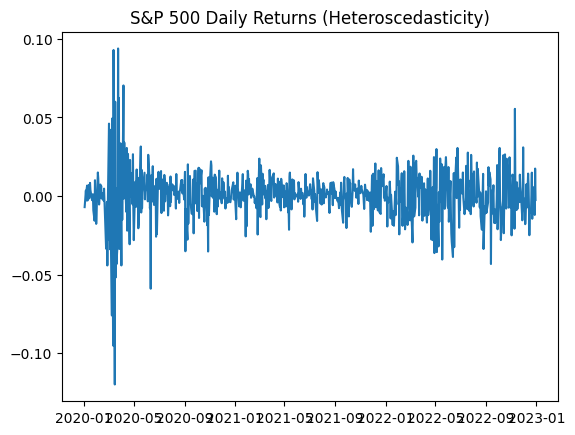

In [ ]:
plt.plot(returns)
plt.title("S&P 500 Daily Returns (Heteroscedasticity)")
plt.show()

For Normal Distribution Kurtosis is 3 but, in our case, high kurtosis of 10.03 indicates fat tails and extreme events.
This high kurtosis means higher probability of blackswan events(Like Covid, subprime crisis etc.).In the volatility plot we can see high volatility period and followed by calm periods. We can combine fat-tailed distributions with dynamic volatility adjustments for robust forecasting.

**Diagnosis**                                                                    
1)Calculate the sample excess kurtosis. Values greater than 0 indicate fat tails.                                                                           
2)Heteroscedasticity: Use statistical tests like the ARCH-LM test or visualize volatility clustering.                                                           
**Damage**                                                                       
Ignoring kurtosis and heteroscedasticity can lead to underestimating the risk of extreme events, resulting in poor risk management and derivative pricing.      
**Directions**                                                                   
1)Use GARCH models to model time-varying volatility.                             
2)Incorporate Student’s t-distribution or Generalized Error Distribution (GED) to account for fat tails.
